## Generative Adversial Network using Vision Transformers
In this problem we'll be trying to develop a GAN based on the CIFAR-10 Dataset and a vision transformer based discriminator

## Understanding Generative Adversarial Networks (GANs)

Generative adversarial networks (GANs) are algorithmic architectures that use two neural networks, pitting one against the other (thus the “adversarial”) in order to generate new, synthetic instances of data that can pass for real data. They are used widely in image generation, video generation and voice generation.

GANs were introduced in a paper by Ian Goodfellow and other researchers at the University of Montreal, including Yoshua Bengio, in 2014. Referring to GANs, Facebook’s AI research director Yann LeCun called adversarial training “the most interesting idea in the last 10 years in ML.”

GANs’ potential for both good and evil is huge, because they can learn to mimic any distribution of data. That is, GANs can be taught to create worlds eerily similar to our own in any domain: images, music, speech, prose. They are robot artists in a sense, and their output is impressive – poignant even. But they can also be used to generate fake media content, and are the technology underpinning Deepfakes.

## How GANs Work

One neural network, called the generator, generates new data instances, while the other, the discriminator, evaluates them for authenticity; i.e. the discriminator decides whether each instance of data that it reviews belongs to the actual training dataset or not.

Let’s say we’re trying to do something more banal than mimic the Mona Lisa. We’re going to generate hand-written numerals like those found in the MNIST dataset, which is taken from the real world. The goal of the discriminator, when shown an instance from the true MNIST dataset, is to recognize those that are authentic.

Meanwhile, the generator is creating new, synthetic images that it passes to the discriminator. It does so in the hopes that they, too, will be deemed authentic, even though they are fake. The goal of the generator is to generate passable hand-written digits: to lie without being caught. The goal of the discriminator is to identify images coming from the generator as fake.

![GANs.png](attachment:GANs.png)
Here are the steps a GAN takes:

    The generator takes in random numbers and returns an image.
    This generated image is fed into the discriminator alongside a stream of images taken from the actual, ground truth dataset.
    The discriminator takes in both real and fake images and returns probabilities, a number between 0 and 1, 
    with 1 representing a prediction of authenticity and 0 representing fake.

So you have a double feedback loop:

    The discriminator is in a feedback loop with the ground truth of the images, which we know.
    The generator is in a feedback loop with the discriminator.


You can think of a GAN as the opposition of a counterfeiter and a cop in a game of cat and mouse, where the counterfeiter is learning to pass false notes, and the cop is learning to detect them. Both are dynamic; i.e. the cop is in training, too (to extend the analogy, maybe the central bank is flagging bills that slipped through), and each side comes to learn the other’s methods in a constant escalation.

For MNIST, the discriminator network is a standard convolutional network that can categorize the images fed to it, a binomial classifier labeling images as real or fake. The generator is an inverse convolutional network, in a sense: While a standard convolutional classifier takes an image and downsamples it to produce a probability, the generator takes a vector of random noise and upsamples it to an image. The first throws away data through downsampling techniques like maxpooling, and the second generates new data.

Both nets are trying to optimize a different and opposing objective function, or loss function, in a zero-zum game. This is essentially an actor-critic model. As the discriminator changes its behavior, so does the generator, and vice versa. Their losses push against each other.

 ## Actual Implementation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Problemstatement.txt
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset/valid/input/354-inputs.png
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset/valid/input/340-inputs.png
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset/valid/input/333-inputs.png
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset/valid/input/335-inputs.png
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset/valid/input/355-inputs.png
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset/valid/input/326-inputs.png
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset/valid/input/343-inpu

In [2]:
import os
os.listdir('/kaggle/input')

['imagedehazing-isrodataset']

In [3]:
#importing necessary libraries
import numpy as np
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.optimizers import Adam

from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot as plt
import tensorflow as tf

2024-05-02 11:54:44.650608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-02 11:54:44.650750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-02 11:54:44.916900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Dataset preparation 
CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset (covered in the next section) by researchers at the CIFAR institute.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, airplanes, etc.

These are very small images, much smaller than a typical photograph, and the dataset is intended for computer vision research.

Keras provides access to the CIFAR10 dataset via the cifar10.load_dataset() function. It returns two tuples, one with the input and output elements for the standard training dataset, and another with the input and output elements for the standard test dataset.

In [4]:
count = 0
for root, folders, filenames in os.walk('/kaggle/input'):
   print(root, folders)

/kaggle/input ['imagedehazing-isrodataset']
/kaggle/input/imagedehazing-isrodataset ['SS594_Multispectral_Dehazing']
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing ['Haze1k', 'GT', 'hazy']
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k ['Haze1k']
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k ['Haze1k_thick', 'Haze1k_thin', 'Haze1k_moderate']
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick ['dataset', 'SAR']
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset ['valid', 'test', 'train']
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset/valid ['input', 'target']
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thick/dataset/valid/input []
/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze

Input images shape: (320, 512, 512, 3)
Target images shape: (320, 512, 512, 3)


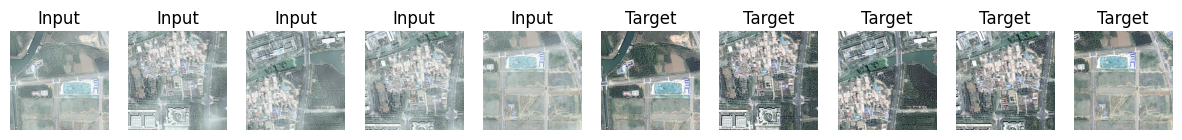

In [5]:
import os
import matplotlib.pyplot as plt
load_path = '/kaggle/input/imagedehazing-isrodataset/SS594_Multispectral_Dehazing/Haze1k/Haze1k/Haze1k_thin/dataset/train'
input_dir = os.path.join(load_path + '/input/')
# load dataset dehaze
target_dir = os.path.join(load_path + '/target/')
# Define the number of images to load
num_images = 320
# Load the input and target images
input_images = []
target_images = []
for i in range(1, num_images+1):
    input_path = os.path.join(input_dir, f'{i}-inputs.png')
    target_path = os.path.join(target_dir, f'{i}-targets.png')
    input_image = plt.imread(input_path)
    target_image = plt.imread(target_path)
    input_images.append(input_image)
    target_images.append(target_image)

# Convert the input and target images to numpy arrays
input_images = np.array(input_images)
target_images = np.array(target_images)

# Print the shape of the input and target images
print('Input images shape:', input_images.shape)
print('Target images shape:', target_images.shape)

plt.figure(figsize=(15, 15))
for i in range(5):
    ax = plt.subplot(5, 10, i + 1)
    plt.imshow(input_images[i])
    plt.title('Input')
    plt.axis("off")
    ax = plt.subplot(5, 10, i + 1 + 5)
    plt.imshow(target_images[i])
    plt.title('Target')
    plt.axis("off")

In [6]:
# Load a single input image
input_image = plt.imread(os.path.join(input_dir, '1-inputs.png'))

# Print the shape of the input image
print('Input image shape:', input_image.shape)

Input image shape: (512, 512, 3)


In [7]:
# Reshape and normalize the input images
input_images = input_images.reshape(input_images.shape[0], 512, 512, 3).astype('float32')
input_images = (input_images - 127.5) / 127.5
target_images = target_images.reshape(target_images.shape[0], 512, 512, 3).astype('float32')
target_images = (target_images - 127.5) / 127.5

## Creating the Generator architecture

The generator uses tf.keras.layers.Conv2DTranspose (upsampling) layers to produce an image from a seed (random noise). Start with a Dense layer that takes this seed as input, then upsample several times until you reach the desired image size of 32x32x3. Notice the tf.keras.layers.LeakyReLU activation for each layer, except the output layer which uses tanh.

In [8]:
# Define the generator model: U-Net Architecture
def create_generator():
    inputs = tf.keras.Input(shape=(512, 512, 3))
    # Downsampling
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
    # Upsampling
    x = tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=(2, 2), padding='same')(x)
    outputs = tf.keras.layers.Activation('tanh')(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 512, 512, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 512, 512, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 256, 256, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 256)  │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 256)  │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 128, 128, 128)  │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 256, 256, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 512, 512, 3)    │         1,731 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512, 512, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,884,995 (7.19 MB)

 Trainable params: 1,884,995 (7.19 MB)

 Non-trainable params: 0 (0.00 B)

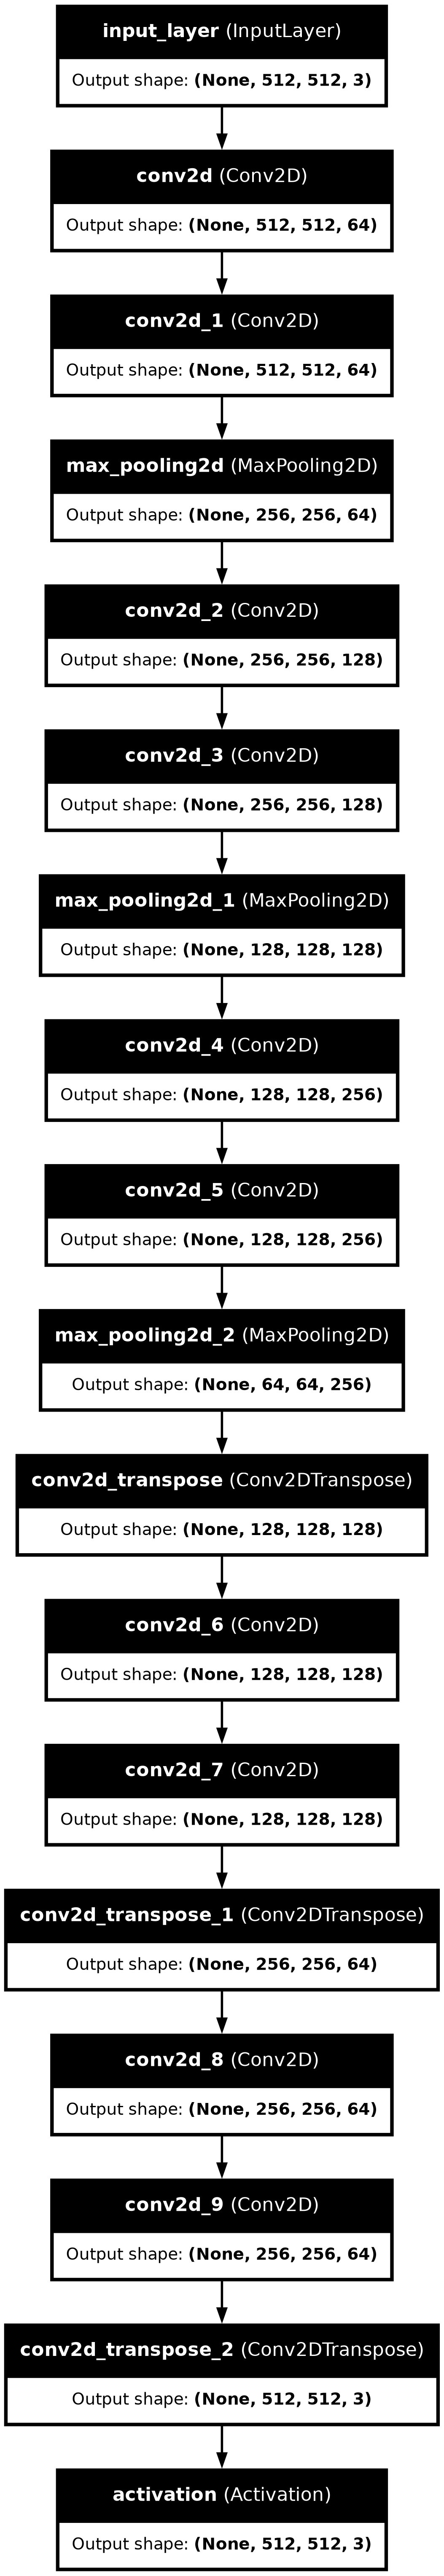

In [9]:
generator = create_generator()
generator.summary()
tf.keras.utils.plot_model(generator, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

## Vision Transformers(ViT)

The concept of Vision Transformer (ViT) is an extension of the original concept of Transformer. It is only the application of Transformer in the image domain with slight modification in the implementation in order to handle the different data modality. More specifically, a ViT uses different methods for tokenization and embedding. However, the generic architecture remains the same. An input image is split into a set of image patches, called visual tokens. The visual tokens are embedded into a set of encoded vectors of fixed dimension. The position of a patch in the image is embedded along with the encoded vector and fed into the transformer encoder network which is essentially the same as the one responsible for processing the text input. 

<img src=https://miro.medium.com/max/700/1*_c8SqxPMY_dsApyvDJ8HtA.gif width=600/>

There are multiple blocks in the ViT encoder and each block consists of three major processing elements: Layer Norm, Multi-head Attention Network (MSP) and Multi-Layer Perceptrons (MLP). Layer Norm keeps the training process on track and let model adapt to the variations among the training images. MSP is a network responsible for generation of attention maps from the given embedded visual tokens. These attention maps help network focus on most important regions in the image such as object(s).

In [10]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 3
image_size = 512  # We'll resize input images to this size
patch_size = 8  # Size of the patches to be extract from the input images
num_patches = (image_size // image_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 2
mlp_head_units = [128, 64]  # Size of the dense layers of the final classifier

## Multi-layer perceptron

In [11]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

## Implement patch creation as a layer

In [12]:
class Patches(tf.keras.layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

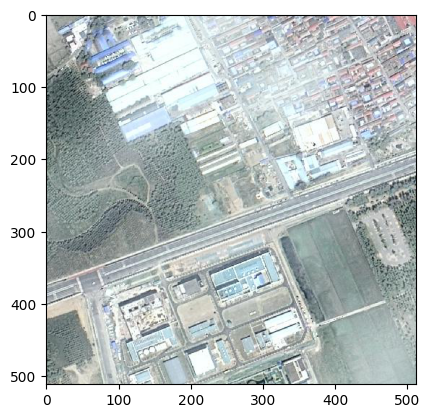

In [13]:
%matplotlib inline
plt.figure()
image = input_images[100]

# Normalize pixel values to [0, 1]
image_norm = (image - image.min()) / (image.max() - image.min())

# Display the normalized image
plt.imshow(image_norm)
plt.imshow(image_norm, cmap='gray', vmin=0, vmax=255)

In [14]:
resized_image = tf.image.resize(
    tf.convert_to_tensor([image_norm]), size=(image_size, image_size)
)

In [15]:
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

Image size: 512 X 512
Patch size: 8 X 8
Patches per image: 4096
Elements per patch: 192


64


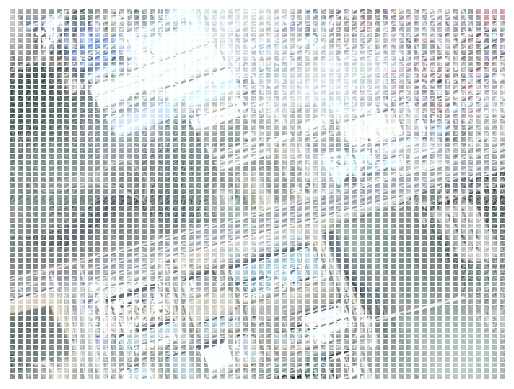

In [16]:
n = int(np.sqrt(patches.shape[1]))
print(n)
plt.figure()
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy())
    plt.axis("off")

## Creating the patch encoder

In [17]:
class PatchEncoder(tf.keras.layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

## Building the ViT

In [18]:
def create_vit_classifier():
    inputs = layers.Input(shape=(512, 512, 3))
    # Augment data.
    # Create patches.
    patches = Patches(patch_size)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.GlobalAveragePooling1D()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(1, activation='sigmoid')(features)
    # Create the Keras model.
    model = tf.keras.Model(inputs=inputs, outputs=logits)
    
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_1 (Patches) │ (None, None, 192) │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder       │ (None, None, 64)  │     12,416 │ patches_1[0][0]   │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, None, 64)  │        128 │ patch_encoder[0]… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 64)  │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, None, 64)  │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 64)  │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, None, 128) │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, None, 128) │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, None, 64)  │      8,256 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, None, 64)  │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, None, 64)  │          0 │ dropout_2[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 64)  │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, None, 64)  │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, None, 64)  │          0 │ multi_head_atten… │
│                     │                   │            │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, None, 64)  │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, None, 128) │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, None, 128) │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, None, 64)  │      8,256 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 195,585 (764.00 KB)

 Trainable params: 195,585 (764.00 KB)

 Non-trainable params: 0 (0.00 B)

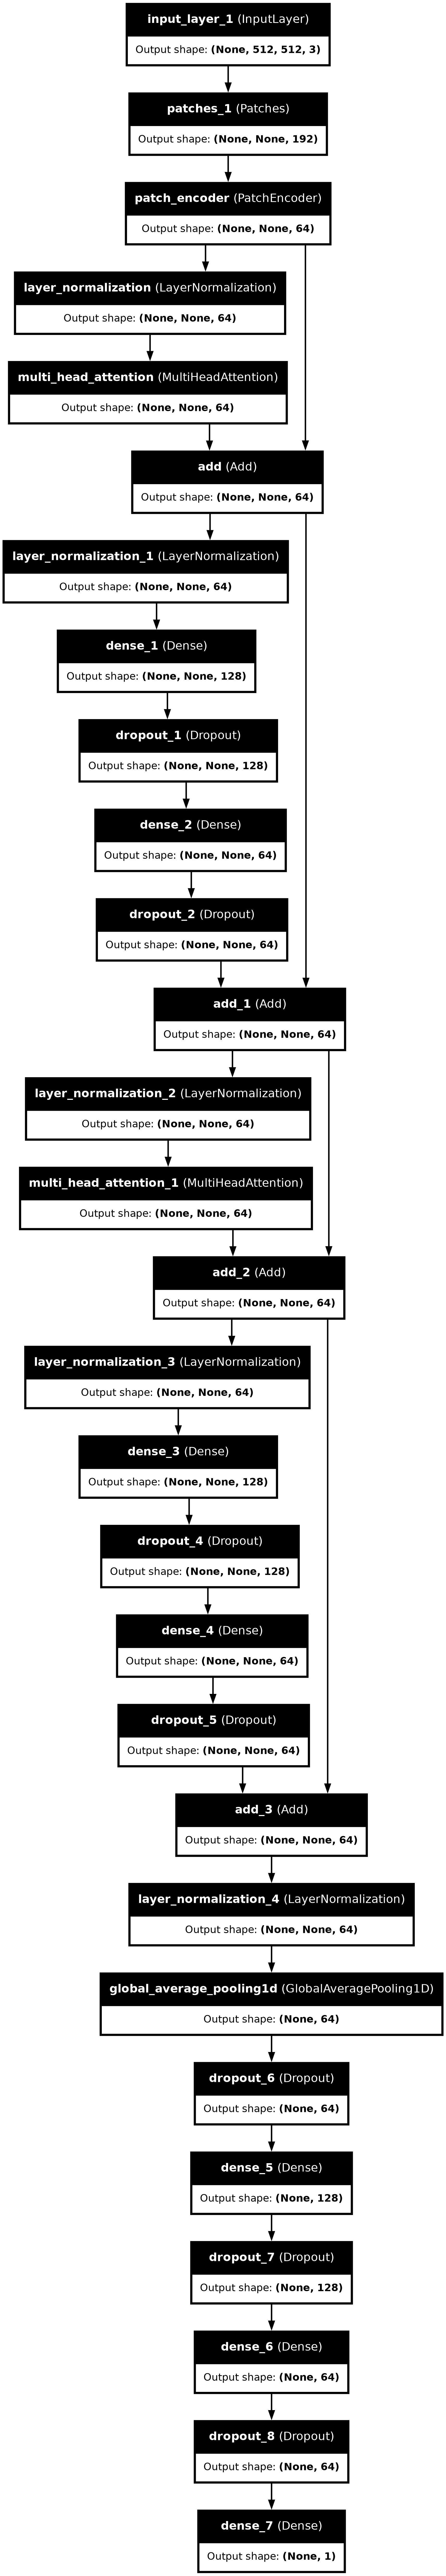

In [19]:
discriminator = create_vit_classifier()
discriminator.summary()
tf.keras.utils.plot_model(discriminator, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

## GAN Definition
The function below takes as arguments the already-defined generator and discriminator models and creates the new, logical third model subsuming these two models. The weights in the discriminator are marked as not trainable, which only affects the weights as seen by the GAN model and not the standalone discriminator model.

In [20]:
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

## Generating Real Samples
The function below will take the training dataset as an argument and will select a random subsample of images; it will also return class labels for the sample, specifically a class label of 1, to indicate real images.

In [21]:
def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]
    return X

## Generating Latent space points
The array of random numbers can then be reshaped into samples, that is n rows with 100 elements per row. The function below implements this and generates the desired number of points in the latent space that can be used as input to the generator model.

In [22]:
def generate_latent_points(latent_dim, n_samples):
    x_input = randn(n_samples, 512, 512, 3)
    return x_input

## Generating Fake Samples
The function below implements this behavior and generates images of random pixel values and their associated class label of 0, for fake.

In [23]:
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    return X

As we are evaluating the discriminator on 100 generated CIFAR-10 images, we can plot about half, or 49, as a 7 by 7 grid. The save_plot() function below implements this, again saving the resulting plot with a unique filename based on the epoch number.

In [24]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
	# scale from [-1,1] to [0,1]
	examples = (examples + 1) / 2.0
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i])
	# save plot to file
	filename = 'generated_plot_e%03d.png' % (epoch+1)
	plt.savefig(filename)
	plt.close()

## Performance Measurement
we summarize the performance of the discriminator model. It does this by retrieving a sample of real CIFAR-10 images, as well as generating the same number of fake CIFAR-10 images with the generator model, then evaluating the classification accuracy of the discriminator model on each sample, and reporting these scores.

In [25]:
import math
import numpy as np
import cv2

def ssim(img1, img2):
    C1 = (0.01 * 255)**2
    C2 = (0.03 * 255)**2

    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    window = np.outer(kernel, kernel.transpose())

    mu1 = cv2.filter2D(img1, -1, window)[5:-5, 5:-5]  # valid
    mu2 = cv2.filter2D(img2, -1, window)[5:-5, 5:-5]
    mu1_sq = mu1**2
    mu2_sq = mu2**2
    mu1_mu2 = mu1 * mu2
    sigma1_sq = cv2.filter2D(img1**2, -1, window)[5:-5, 5:-5] - mu1_sq
    sigma2_sq = cv2.filter2D(img2**2, -1, window)[5:-5, 5:-5] - mu2_sq
    sigma12 = cv2.filter2D(img1 * img2, -1, window)[5:-5, 5:-5] - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) *
                                                            (sigma1_sq + sigma2_sq + C2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    '''calculate SSIM
    the same outputs as MATLAB's
    img1, img2: [0, 255]
    '''
    print(f'Image 1 shape: {img1.shape} Image 2 Shape:{img2.shape}')
    if not img1.shape == img2.shape:
        raise ValueError('Input images must have the same dimensions.')
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))
    else:
        raise ValueError('Wrong input image dimensions.')

In [26]:
import math
def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [27]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    # prepare real samples
    X_real, _ = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    _, acc_real = d_model.evaluate(X_real, np.ones((n_samples, 1)), verbose=0)
    # prepare fake examples
    X_fake, _ = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    _, acc_fake = d_model.evaluate(X_fake, np.zeros((n_samples, 1)), verbose=0)
    # summarize discriminator performance
    print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    # calculate psnr and ssim scores
    psnr_scores = []
    ssim_scores = []
    for i in range(n_samples):
        real_image = X_real[i]
        fake_image = X_fake[i]
        psnr_score = psnr(real_image, fake_image, data_range=1.0)
        ssim_score = ssim(real_image, fake_image, data_range=1.0, multichannel=True)
        psnr_scores.append(psnr_score)
        ssim_scores.append(ssim_score)
    avg_psnr = np.mean(psnr_scores)
    avg_ssim = np.mean(ssim_scores)
    print('>Average PSNR: %.2f dB' % avg_psnr)
    print('>Average SSIM: %.4f' % avg_ssim)
    # save plot
    save_plot(X_fake, epoch)
    # save the generator model file to the Kaggle output directory
    output_path = os.path.join('/kaggle/working/', 'generator_model_%04d.h5' % (epoch+1))
    g_model.save(output_path)

In [28]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=3, n_batch=2):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    psnr_scores = []
    ssim_scores = []
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real = generate_real_samples(dataset, half_batch)
            # update discriminator model weights
            d_loss1, _ = d_model.train_on_batch(X_real, np.ones((half_batch, 1)))
            # generate 'fake' examples
            X_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update discriminator model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, np.zeros((half_batch, 1)))
            # prepare points in latent space as input for the generator
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = np.ones((n_batch, 1))
            # update the generator via the discriminator's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # calculate PSNR and SSIM scores for the generated images
            print(f"Real:{X_real.shape}, Fake:{X_fake.shape}")
            psnr_score = calculate_psnr(X_real, X_fake)
            X_real = np.squeeze(X_real)
            X_fake = np.squeeze(X_fake)
            ssim_score = calculate_ssim(X_real, X_fake)
            psnr_scores.append(psnr_score)
            ssim_scores.append(ssim_score)
            # summarize loss on this batch
            print('>%d, %d, d1=%.3f, d2=%.3f, g=%.3f, p=%.3f, s=%.3f'%
                  (i+1, j+1, d_loss1, d_loss2, g_loss, psnr_score, ssim_score))
        # evaluate the model performance, sometimes
        if (i+1) % 1000 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)
    return psnr_scores, ssim_scores

In [29]:
# # size of the latent space
# latent_dim = 100
# # create the discriminator
# d_model = create_vit_classifier()
# # create the generator
# g_model = create_generator()
# # create the gan
# gan_model = define_gan(g_model, d_model)
# N = 50  # number of images to keep
# idx = np.random.choice(input_images.shape[0], N, replace=False)
# input_images = input_images[idx]
# target_images = target_images[idx]
# # load image data
# # assuming you have two arrays `input_images` and `target_images` of shape (n, 512, 512, 3)
# dataset = np.concatenate((input_images, target_images), axis=0)
# # train model
# train(g_model, d_model, gan_model, dataset, latent_dim)
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = create_vit_classifier()
# create the generator
g_model = create_generator()
# create the gan
gan_model = define_gan(g_model, d_model)
N = 50  # number of images to keep
idx = np.random.choice(input_images.shape[0], N, replace=False)
input_images = input_images[idx]
target_images = target_images[idx]
# load image data
# assuming you have two arrays `input_images` and `target_images` of shape (n, 512, 512, 3)
dataset = np.concatenate((input_images, target_images), axis=0)
# train model
psnr_scores, ssim_scores = train(g_model, d_model, gan_model, dataset, latent_dim)

# create a DataFrame from the scores
results = pd.DataFrame({'PSNR': psnr_scores, 'SSIM': ssim_scores})

# save the DataFrame to a CSV file
results.to_csv('results.csv', index=False)

/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")
I0000 00:00:1714651172.961571    2333 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


W0000 00:00:1714651239.971276    2336 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


Real:(1, 512, 512, 3), Fake:(1, 512, 512, 3)
Image 1 shape: (512, 512, 3) Image 2 Shape:(512, 512, 3)
>1, 1, d1=1.986, d2=1.068, g=1.784, p=48.178, s=0.868
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Real:(1, 512, 512, 3), Fake:(1, 512, 512, 3)
Image 1 shape: (512, 512, 3) Image 2 Shape:(512, 512, 3)
>1, 2, d1=1.177, d2=1.346, g=1.260, p=48.156, s=0.867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Real:(1, 512, 512, 3), Fake:(1, 512, 512, 3)
Image 1 shape: (512, 512, 3) Image 2 Shape:(512, 512, 3)
>1, 3, d1=1.323, d2=1.283, g=1.066, p=48.154, s=0.867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Real:(1, 512, 512, 3), Fake:(1, 512, 512, 3)
Image 1 shape: (512, 512, 3) Image 2 Shape:(512, 512, 3)
>1, 4, d1=1.112, d2=1.015, g=1.122, p=48.151, s=0.867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Real:(1, 512, 512, 3), Fake:(1, 512, 512, 3)
Image 1 shape: (512, 512, 3) Image 2 Shape:(512, 512, 3)
>1, 5, d1=1.177, d2=1.133, g=1.044, p=48.155, s=0.867
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Real:(1, 512, 512, 3), Fake:(1

In [30]:
output_path = os.path.join('/kaggle/working/', 'results.csv')

Once a final generator model is selected, it can be used in a standalone manner for your application.
This involves first loading the model from file, then using it to generate images. The generation of each image requires a point in the latent space as input.

![generated_plot_e200.png](attachment:generated_plot_e200.png)

In this case, we used the model saved after 600 training epochs.